# Stock Market API Project

In [1]:
import streamlit as st

In [2]:
api_key = st.secrets["API_KEY"]

# Symbol Search

In [6]:
import requests
import pandas as pd

url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {
    "datatype": "json",
    "keywords": "State Bank of India",
    "function": "SYMBOL_SEARCH",
}

headers = {"x-rapidapi-key": api_key, "x-rapidapi-host": "alpha-vantage.p.rapidapi.com"}

response = requests.get(url, headers=headers, params=querystring)

data = response.json()["bestMatches"]

res = pd.DataFrame(data)

res

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,SBIN.BSE,State Bank of India,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,1.0000
1,SBKFF,State Bank of India,Equity,United States,09:30,16:00,UTC-04,USD,1.0000
2,SID.FRK,State Bank of India,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,1.0000
3,SBID.LON,State Bank of India GDR,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.9048


### Getting acutal data for SBIN.BSE

In [ ]:
url = "https://alpha-vantage.p.rapidapi.com/query"

querystring = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "SBIN.BSE",
    "outputsize": "compact",
    "datatype": "json",
}

headers = {
    "x-rapidapi-key": api_key,
    "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
}

response = requests.get(url, headers=headers, params=querystring)

data2 = response.json()["Time Series (Daily)"]
res2 = pd.DataFrame(data2).T

# Convert output to float
res2 = res2.astype(float)

# Conert to index to datetime
res2.index = pd.to_datetime(res2.index)

res2

,1. open,2. high,3. low,4. close,5. volume
2025-05-02,792.05,802.95,789.25,800.05,335006.0
2025-04-30,812.85,812.85,784.45,788.15,412886.0
2025-04-29,820.00,829.00,808.75,811.75,699284.0
2025-04-28,796.30,822.50,796.30,817.60,1068737.0
2025-04-25,813.60,819.10,787.10,798.75,383883.0
...,...,...,...,...,...
2024-12-10,862.00,868.85,858.50,867.60,197287.0
2024-12-09,862.95,866.80,856.75,857.85,646144.0
2024-12-06,866.95,875.50,856.85,864.00,431320.0
2024-12-05,861.65,871.00,855.65,864.85,379508.0


In [16]:
res2.dtypes

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

In [17]:
res2.index

DatetimeIndex(['2025-05-02', '2025-04-30', '2025-04-29', '2025-04-28',
               '2025-04-25', '2025-04-24', '2025-04-23', '2025-04-22',
               '2025-04-21', '2025-04-17', '2025-04-16', '2025-04-15',
               '2025-04-11', '2025-04-09', '2025-04-08', '2025-04-07',
               '2025-04-04', '2025-04-03', '2025-04-02', '2025-04-01',
               '2025-03-28', '2025-03-27', '2025-03-26', '2025-03-25',
               '2025-03-24', '2025-03-21', '2025-03-20', '2025-03-19',
               '2025-03-18', '2025-03-17', '2025-03-13', '2025-03-12',
               '2025-03-11', '2025-03-10', '2025-03-07', '2025-03-06',
               '2025-03-05', '2025-03-04', '2025-03-03', '2025-02-28',
               '2025-02-27', '2025-02-25', '2025-02-24', '2025-02-21',
               '2025-02-20', '2025-02-19', '2025-02-18', '2025-02-17',
               '2025-02-14', '2025-02-13', '2025-02-12', '2025-02-11',
               '2025-02-10', '2025-02-07', '2025-02-06', '2025-02-05',
      

In [18]:
res2.to_csv("SBIN.csv")

### Plotting the candlestick chart

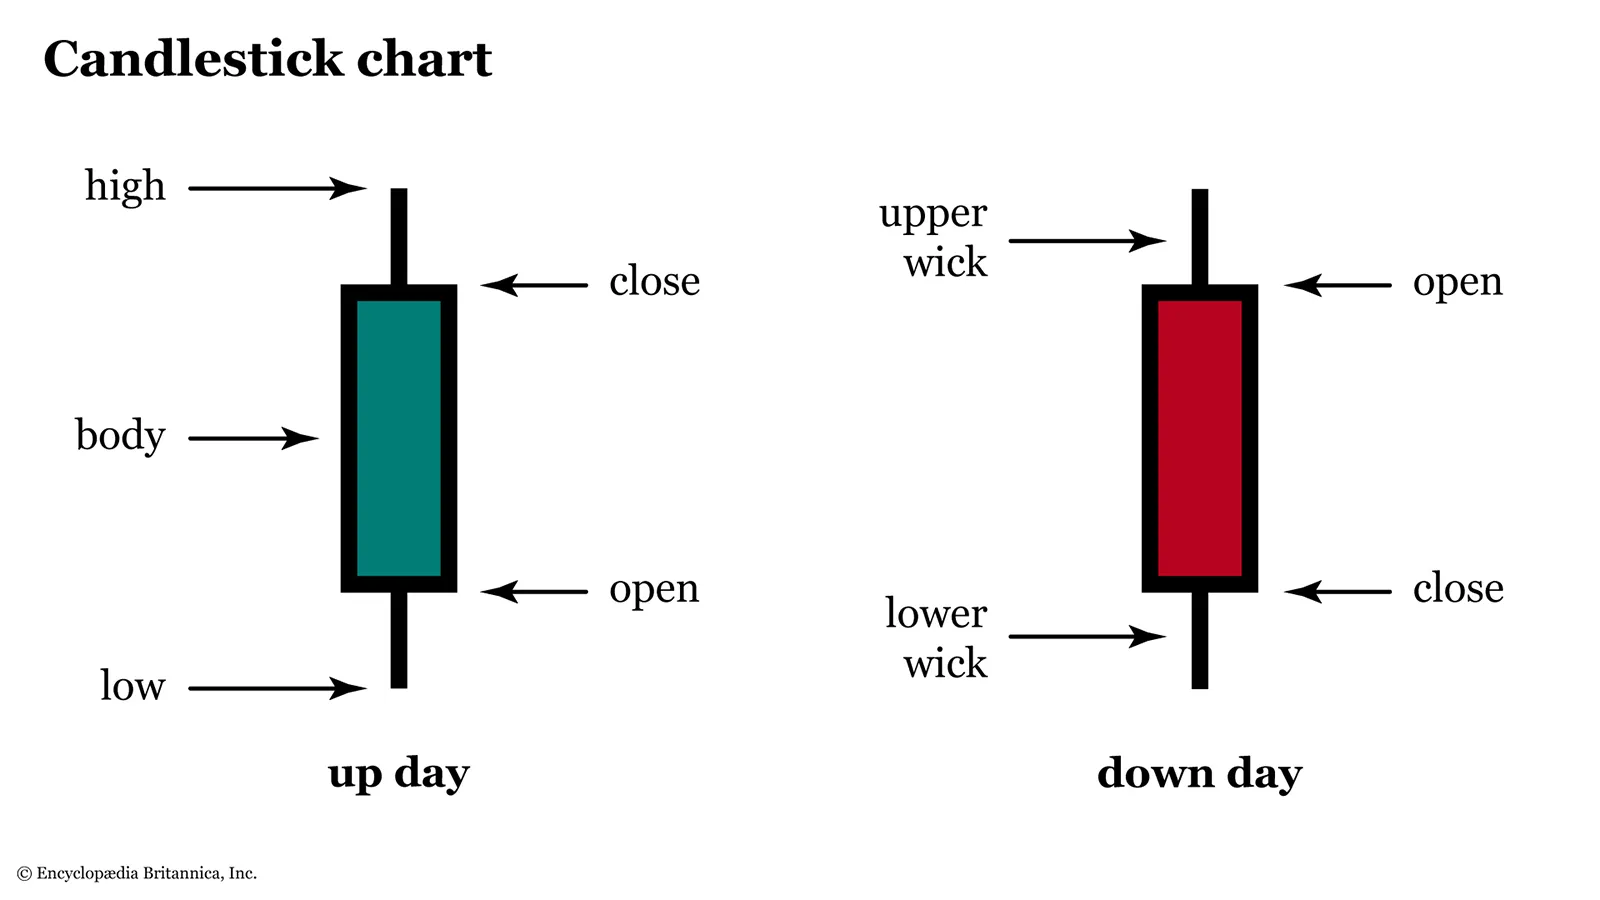

In [19]:
import plotly.graph_objects as go

In [21]:
fig = go.Figure(
    data=[
        go.Candlestick(
            x=res2.index,
            open=res2["1. open"],
            high=res2["2. high"],
            low=res2["3. low"],
            close=res2["4. close"],
        )
    ]
)

fig.update_layout({"width": 1000, "height": 800})

fig.show()

### Create a class to show data / plot for any stocks

In [22]:
class StockAPI:

    def __init__(self):
        self.api_key = st.secrets["API_KEY"]
        self.url = "https://alpha-vantage.p.rapidapi.com/query"
        self.headers = {
            "x-rapidapi-key": self.api_key,
            "x-rapidapi-host": "alpha-vantage.p.rapidapi.com",
        }

    def symbol_search(self, company: str) -> pd.DataFrame:
        querystring = {
            "datatype": "json",
            "keywords": company,
            "function": "SYMBOL_SEARCH",
        }
        response = requests.get(url=self.url, headers=self.headers, params=querystring)
        data = response.json()["bestMatches"]
        return pd.DataFrame(data)

    def stock_data(self, symbol: str) -> pd.DataFrame:
        querystring = {
            "function": "TIME_SERIES_DAILY",
            "symbol": symbol,
            "outputsize": "compact",
            "datatype": "json",
        }
        response = requests.get(url=self.url, headers=self.headers, params=querystring)
        data2 = response.json()["Time Series (Daily)"]
        res2 = pd.DataFrame(data2).T

        # Convert output to float
        res2 = res2.astype(float)

        # Conert to index to datetime
        res2.index = pd.to_datetime(res2.index)

        return res2

    def plot_chart(self, df: pd.DataFrame) -> go.Figure:
        fig = go.Figure(
            data=[
                go.Candlestick(
                    x=df.index,
                    open=df["1. open"],
                    high=df["2. high"],
                    low=df["3. low"],
                    close=df["4. close"],
                )
            ]
        )

        fig.update_layout({"width": 1000, "height": 800})
        return fig

In [23]:
client = StockAPI()

In [24]:
client.symbol_search("HDFC Bank")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,HDB,HDFC Bank Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.8182
1,HDFCBANK.BSE,HDFC Bank Limited,Equity,India/Bombay,09:15,15:30,UTC+5.5,INR,0.8000
2,H1DB34.SAO,HDFC Bank Limited,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6923
3,HDFA.FRK,HDFC Bank Limited,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6923


In [25]:
client.symbol_search("Tesla")

,1. symbol,2. name,3. type,4. region,5. marketOpen,6. marketClose,7. timezone,8. currency,9. matchScore
0,TSLA,Tesla Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8889
1,TL0.DEX,Tesla Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.7143
2,TL0.FRK,Tesla Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.7143
3,TSLA34.SAO,Tesla Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.7143
4,TSLA.TRT,Tesla CDR (CAD Hedged),Equity,Toronto,09:30,16:00,UTC-05,CAD,0.6667
5,TL01.FRK,TESLA INC. CDR DL-001,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.3846


In [26]:
df2 = client.stock_data("HDFCBANK.BSE")
df2

,1. open,2. high,3. low,4. close,5. volume
2025-05-02,1930.00,1941.85,1920.60,1924.55,205709.0
2025-04-30,1914.45,1936.40,1910.20,1923.75,233615.0
2025-04-29,1924.85,1929.00,1900.00,1908.25,280226.0
2025-04-28,1910.00,1929.45,1909.95,1919.40,327548.0
2025-04-25,1922.05,1933.00,1891.90,1910.35,338662.0
...,...,...,...,...,...
2024-12-11,1865.00,1871.05,1857.00,1863.70,66488.0
2024-12-10,1870.25,1875.00,1858.65,1868.05,79717.0
2024-12-09,1853.05,1880.00,1849.55,1869.80,298070.0
2024-12-06,1859.75,1864.15,1843.70,1856.50,308836.0


In [27]:
client.plot_chart(df2)

In [28]:
df3 = client.stock_data("TSLA")
df3

,1. open,2. high,3. low,4. close,5. volume
2025-05-02,284.90,294.7800,279.8100,287.21,114454683.0
2025-05-01,280.01,290.8688,279.8100,280.52,99658974.0
2025-04-30,279.90,284.4500,270.7800,282.16,128961057.0
2025-04-29,285.50,293.3200,279.4695,292.03,108906553.0
2025-04-28,288.98,294.8600,272.4200,285.88,151731771.0
...,...,...,...,...,...
2024-12-12,424.84,429.3000,415.0000,418.10,87752225.0
2024-12-11,409.70,424.8800,402.3800,424.77,104287559.0
2024-12-10,392.68,409.7300,390.8500,400.99,97563578.0
2024-12-09,397.61,404.8000,378.0100,389.79,96359173.0


In [29]:
client.plot_chart(df3)